In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import mlflow
from mlflow import MlflowClient
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from mlflow.models import infer_signature
import plotly.express as px
from plotly import figure_factory
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# from utils import feature_names, convert_bool_to_int
import numpy as np
import math

In [6]:


features_cat = [
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "pub_key_algorithm",
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "issuer_has_common_name", # hefur engin áhrif í rf
    "subject_is_empty", # hefur engin áhrif í rf
    "authority_info_access",# hefur engin áhrif í rf
    "certificate_policies",# hefur engin áhrif í rf
    "basic_constraints", # hefur engin áhrif í rf
    "authority_key_id",# hefur engin áhrif í rf
    "new_sus_keyword",
    "sus_tld",
    "token_is_tld_new",
    "is_international", # hefur engin áhrif í rf
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "has_single_char_subdomain",
    "is_wildcard_match",
    "has_wildcard_san",
    "validation_level",
    # "num_san_dns_names",
    "phish"
]


features_cont = [
    # "validation_level",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    "num_san_dns_names",
    # "len_serial_number",
    # "len_issuer_dn",
    "lcs_sans",
    "lcs_sans_normed",
    # "key_usage_value",
    "domain_len",
    "shannon_entropy",
    # "num_dashes",
    # "num_tokens",
    # "num_parts",
    "frac_special_char",
    "frac_vowels",
    "frac_digits",
    "mean_len_subdomains",
    "char_diversity",
    "alphabet_size",
    "phish"
]

all_features = [
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "pub_key_algorithm",
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "issuer_has_common_name", # hefur engin áhrif í rf
    "subject_is_empty", # hefur engin áhrif í rf
    "authority_info_access",# hefur engin áhrif í rf
    "certificate_policies",# hefur engin áhrif í rf
    "basic_constraints", # hefur engin áhrif í rf
    "authority_key_id",# hefur engin áhrif í rf
    "new_sus_keyword",
    "sus_tld",
    "token_is_tld_new",
    "is_international", # hefur engin áhrif í rf
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "has_single_char_subdomain",
    "is_wildcard_match",
    "has_wildcard_san",
    "validation_level",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    "num_san_dns_names",
    "len_serial_number",
    "len_issuer_dn",
    "lcs_sans",
    "lcs_sans_normed",
    "key_usage_value",
    "domain_len",
    "shannon_entropy",
    "num_dashes",
    "num_tokens",
    "num_parts",
    "frac_special_char",
    "frac_vowels",
    "frac_digits",
    "mean_len_subdomains",
    "char_diversity",
    "alphabet_size",
    "phish",
    "mean_san_domain_len",
    "san_sus_keyword",
    "san_sus_tld",
    "san_shannon_entropy",
    "san_num_dashes",
    "san_num_tokens",
    "san_num_parts",
    "san_token_is_tld",
    "san_frac_special_char",
    "san_is_ip",
    "san_is_international",
    "san_frac_vowels",
    "san_frac_digits",
    "san_has_digit_only_subdomain",
    "san_mean_len_subdomains",
    "san_valid_tld_iana",
    "san_has_single_char_subdomain",
    "san_char_diversity",
    "san_alphabet_size"
]

features_cont_sans = [
    "phish",
    "mean_san_domain_len",
    "san_shannon_entropy",
    "san_token_is_tld",
    "san_frac_special_char",
    "san_frac_vowels",
    "san_frac_digits",
    "san_mean_len_subdomains",
    "san_char_diversity",
    "san_alphabet_size",
    "san_num_dashes",
    "san_num_tokens",
    "san_num_parts",
]


features_cat_sans = [
    "san_sus_keyword",
    "san_sus_tld",
    "san_token_is_tld",
    "san_is_international",
    "san_has_digit_only_subdomain",
    "san_has_single_char_subdomain",
    
]


In [78]:
def convert_bool_to_int(data):
    data["apple_ever_valid"] = data["apple_ever_valid"].astype(int)
    data["nss_ever_valid"] = data["nss_ever_valid"].astype(int)
    data["microsoft_ever_valid"] = data["microsoft_ever_valid"].astype(int)
    data["subject_has_country"] = data["subject_has_country"].astype(int)
    data["subject_has_province"] = data["subject_has_province"].astype(int)
    data["subject_has_locality"] = data["subject_has_locality"].astype(int)
    data["subject_has_common_name"] = data["subject_has_common_name"].astype(int)
    data["subject_only_cn"] = data["subject_only_cn"].astype(int)
    data["crl_dist_point_present"] = data["crl_dist_point_present"].astype(int)
    data["issuer_has_common_name"] = data["issuer_has_common_name"].astype(int)
    data["subject_is_empty"] = data["subject_is_empty"].astype(int)
    # data["valid_timestamps"] = data["valid_timestamps"].astype(int)
    data["authority_info_access"] = data["authority_info_access"].astype(int)
    data["certificate_policies"] = data["certificate_policies"].astype(int)
    data["basic_constraints"] = data["basic_constraints"].astype(int)
    # data["key_usage_present"] = data["key_usage_present"].astype(int)
    # data["extended_key_usage_present"] = data["extended_key_usage_present"].astype(int)
    # data["signed_certificate_timestamp"] = data["signed_certificate_timestamp"].astype(int)
    data["authority_key_id"] = data["authority_key_id"].astype(int)
    # data["in_phish"] = data["in_phish"].astype(int)
    return data

In [7]:
df = pd.read_pickle("balanced_final.pkl")
# indices = df[df.not_before_date < "2021-12-1"].index
# df = df.drop(indices)
# df.drop_duplicates(subset=["serial_number"], inplace=True)
# df["dns_names"] = df["dns_names"].apply(tuple)
# df = df.drop_duplicates(subset=["domain","dns_names", "issuer_dn"])
# df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis = 1)
df=df[all_features]
df.dropna(axis = 0, inplace=True)
df.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)
# df = convert_bool_to_int(df)
# df_cat = df[features_cat]
# df_cat.dropna(axis = 0, inplace=True)
# df_cont = df[features_cont]
# df_cont.dropna(axis = 0, inplace=True)

In [8]:
df.phish.value_counts()

1    5993
0    5913
Name: phish, dtype: int64

In [81]:
df_full = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")

In [82]:
df["phish"] = df['phish'].map({0: False, 1: True})

In [83]:
df

,apple_ever_valid,nss_ever_valid,microsoft_ever_valid,subject_has_country,subject_has_province,subject_has_locality,subject_has_common_name,subject_only_cn,ocsp_urls,crl_dist_point_present,...,san_is_ip,san_is_international,san_frac_vowels,san_frac_digits,san_has_digit_only_subdomain,san_mean_len_subdomains,san_valid_tld_iana,san_has_single_char_subdomain,san_char_diversity,san_alphabet_size
0,True,True,True,False,False,False,True,True,True,False,...,0.0,0.0,0.222222,0.000000,0.0,0.000000,1.0,0.000000,1.000000,9
1,True,True,True,False,False,False,True,True,True,False,...,0.0,0.0,0.147059,0.264706,0.0,3.833333,1.0,0.000000,0.382353,13
2,True,True,True,False,False,False,True,True,True,False,...,0.0,0.0,0.378378,0.000000,0.0,0.500000,1.0,0.500000,0.351351,13
3,True,True,True,False,False,False,True,True,True,False,...,0.0,0.0,0.226000,0.000000,0.0,10.000000,1.0,0.000000,0.013000,26
4,True,True,True,False,False,False,True,True,True,False,...,0.0,0.0,0.162162,0.432432,1.0,6.250000,1.0,0.500000,0.378378,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11901,True,True,True,False,False,False,True,True,True,False,...,0.0,0.0,0.296296,0.074074,0.0,0.500000,1.0,0.500000,0.407407,11
11902,True,True,True,True,True,True,True,False,True,True,...,0.0,0.0,0.329545,0.000000,0.0,3.500000,1.0,0.000000,0.227273,20
11903,True,True,True,False,False,False,True,True,True,False,...,0.0,0.0,0.358491,0.000000,0.0,5.666667,1.0,0.333333,0.226415,12
11904,True,True,True,False,False,False,True,True,True,False,...,0.0,0.0,0.524444,0.000000,0.0,3.075000,1.0,0.950000,0.106667,24


In [10]:
custom_palette = {True: "salmon", False: "skyblue"}


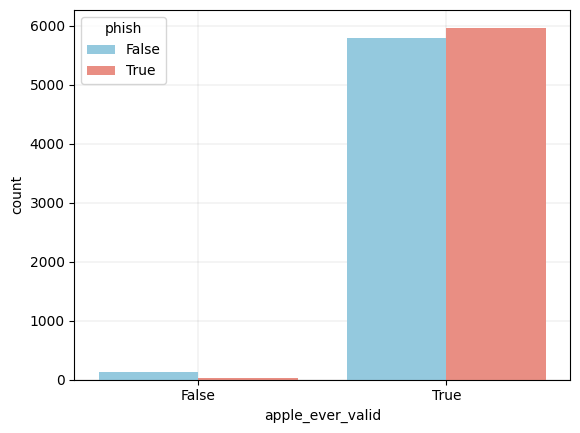

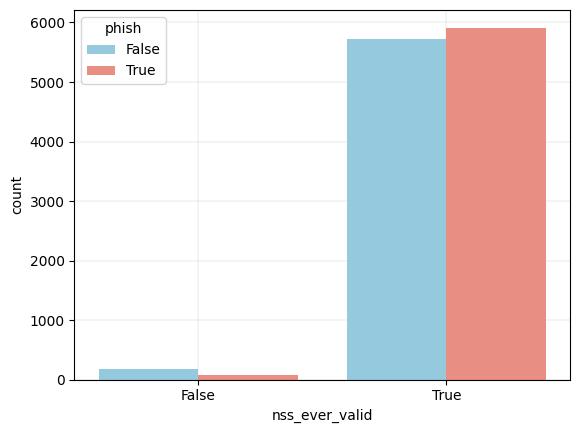

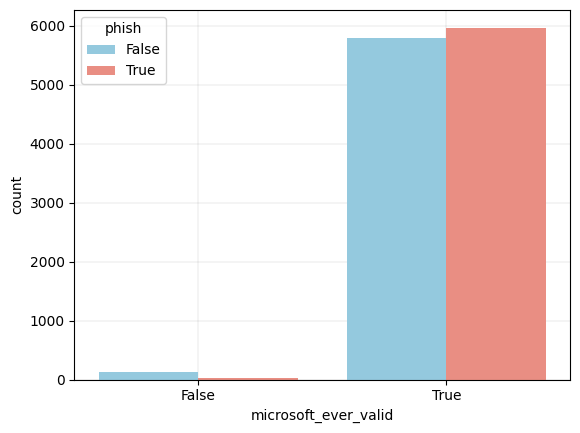

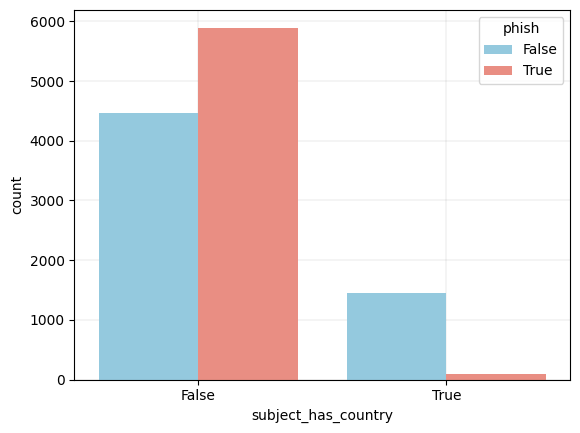

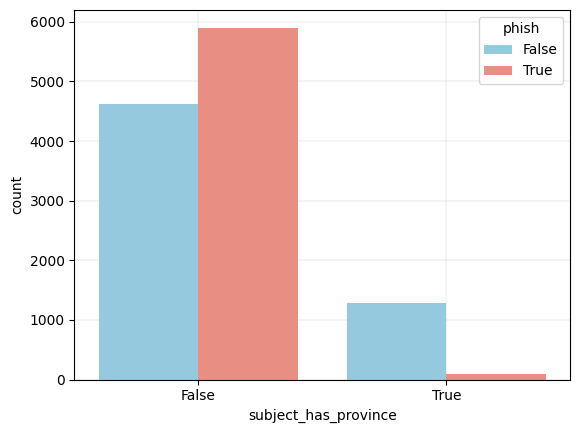

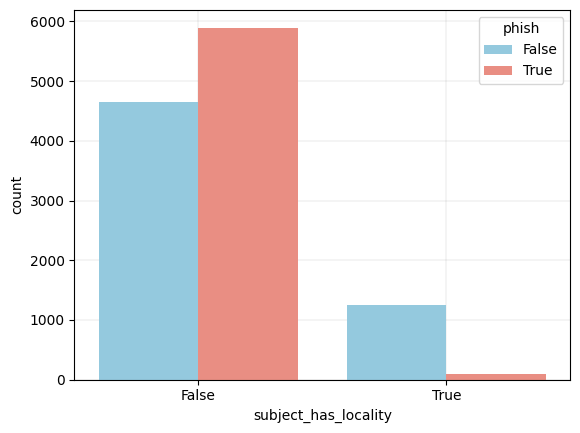

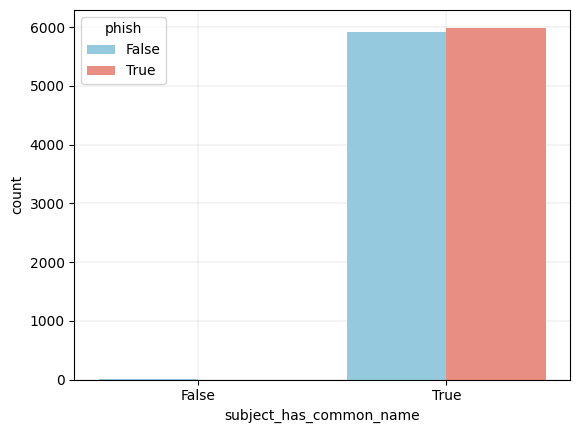

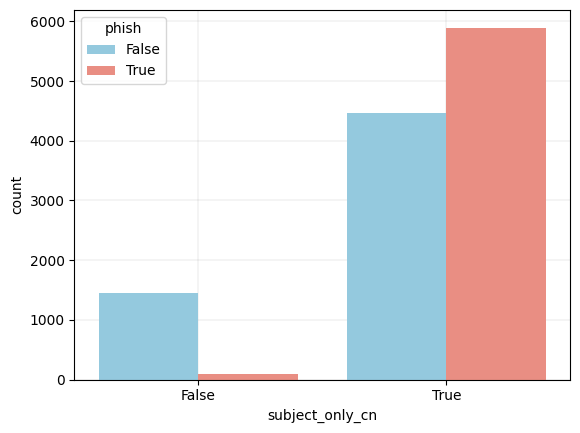

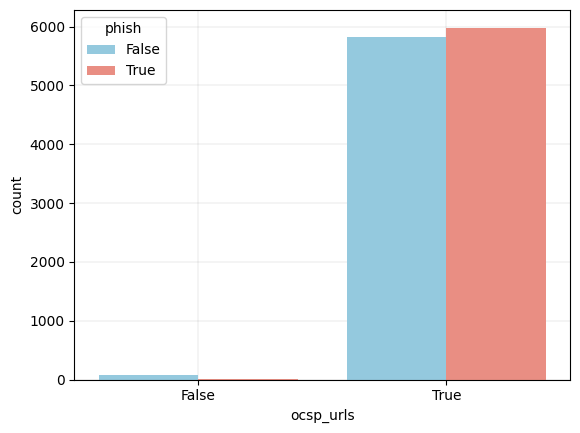

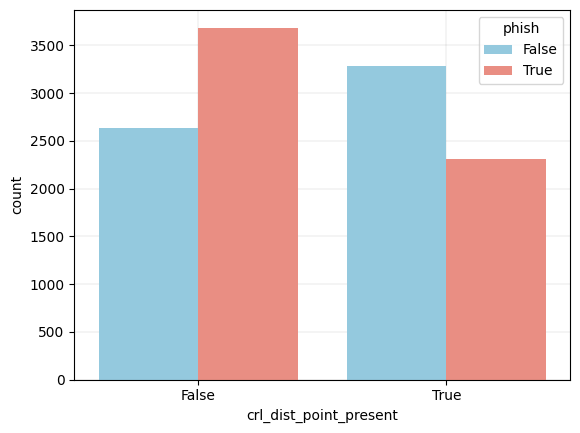

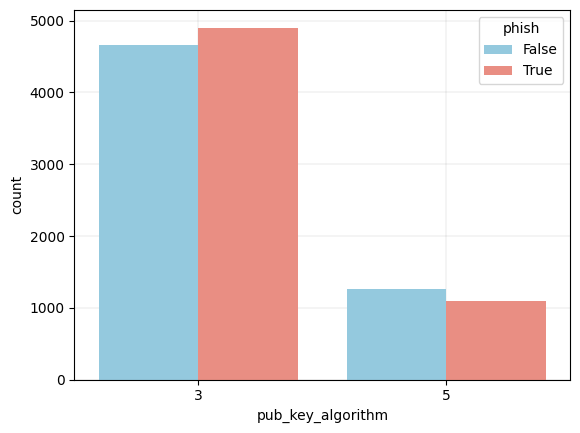

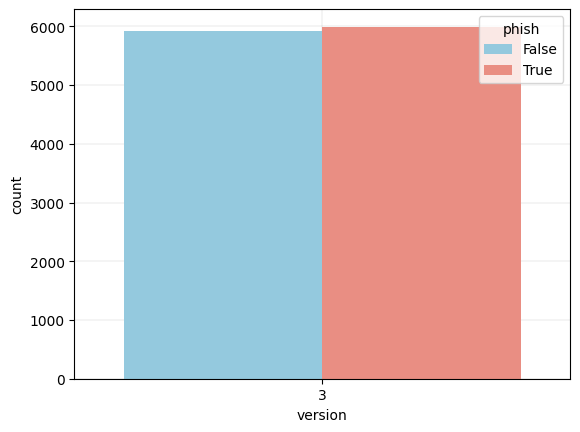

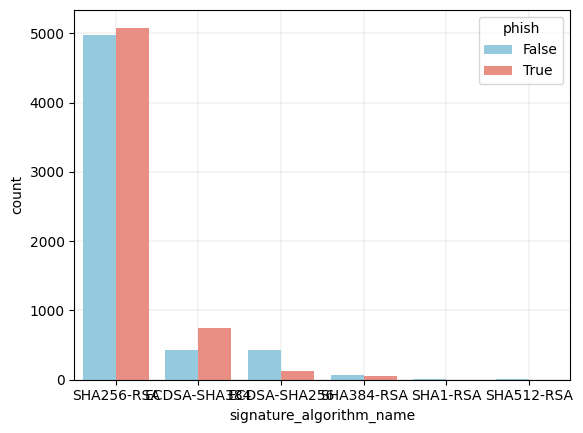

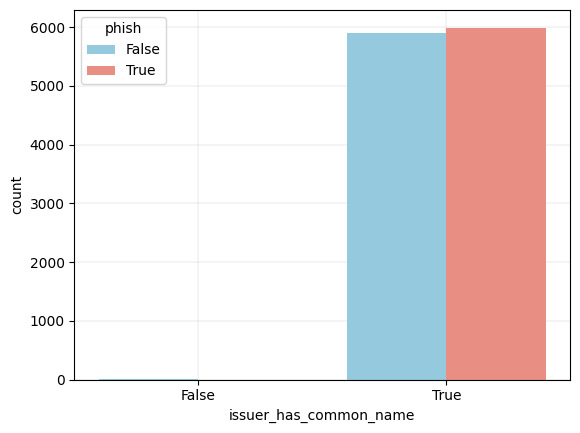

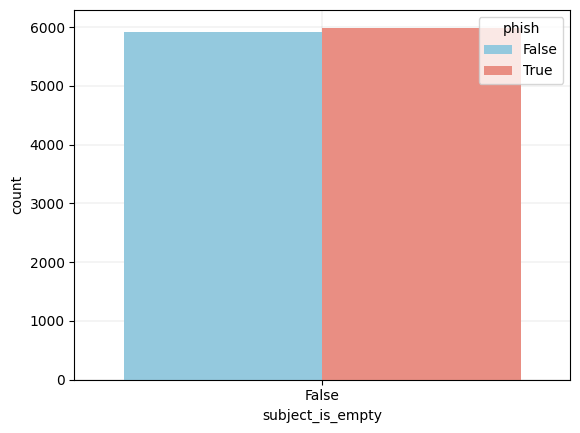

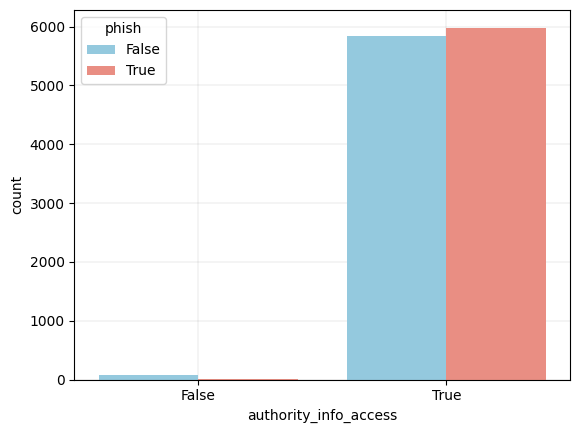

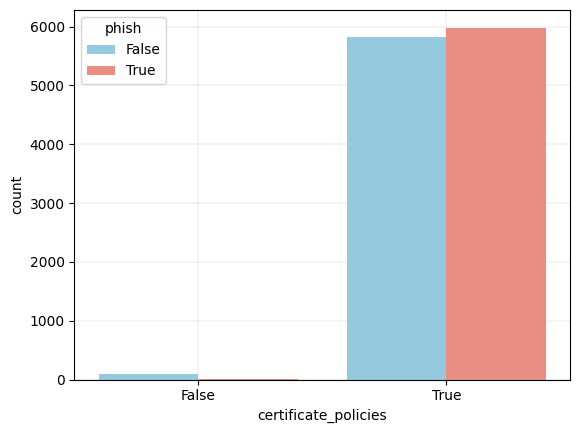

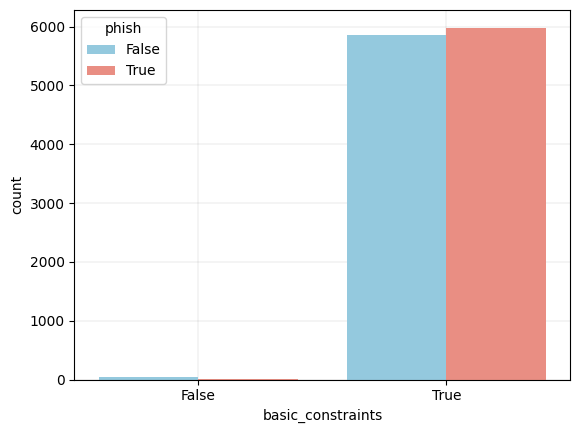

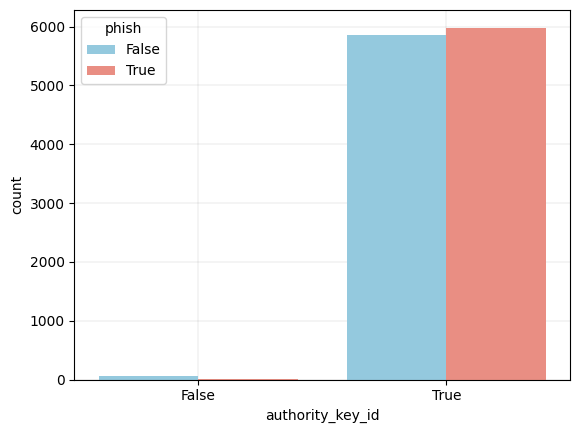

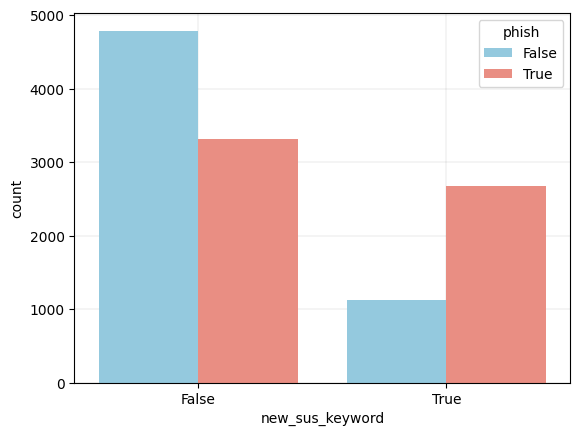

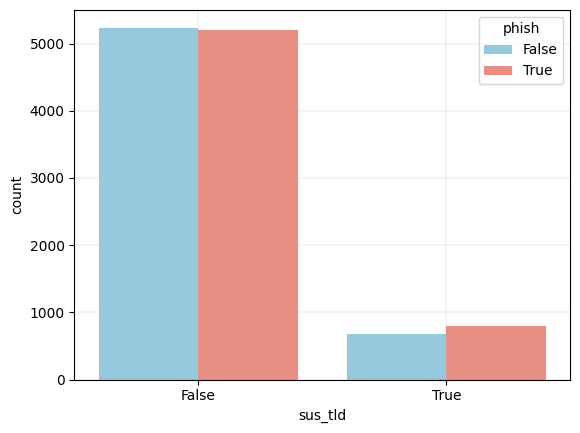

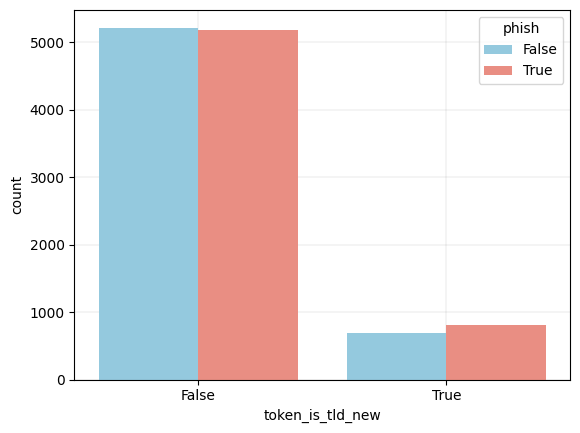

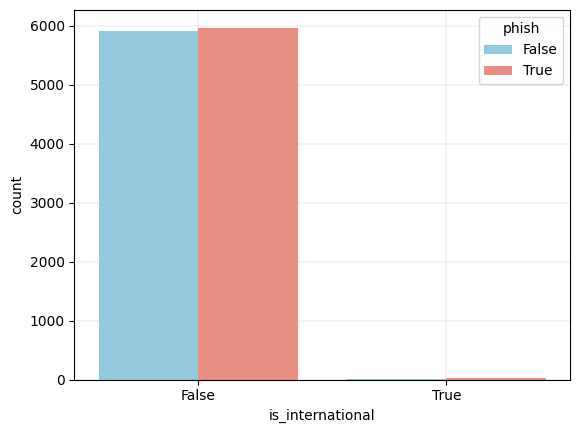

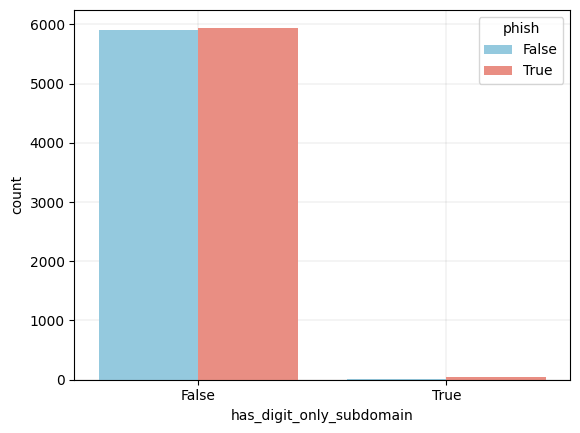

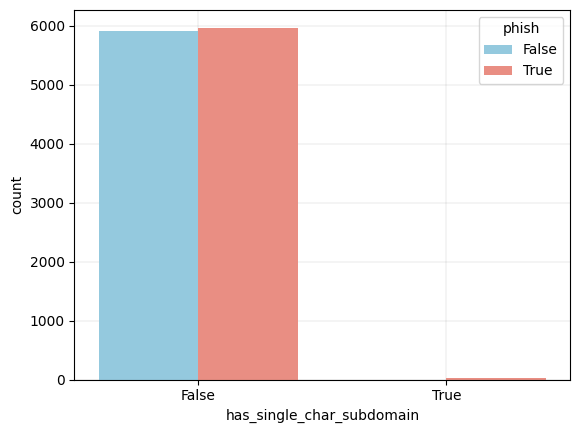

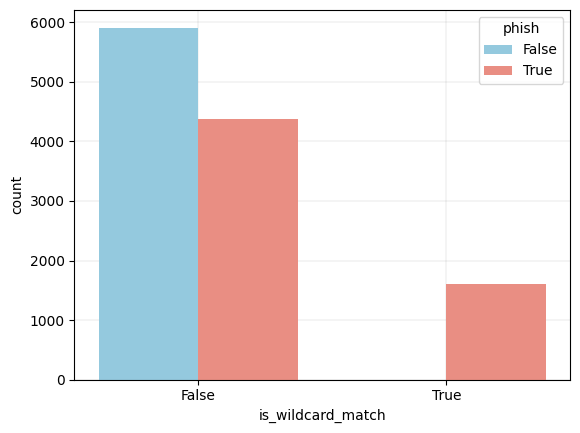

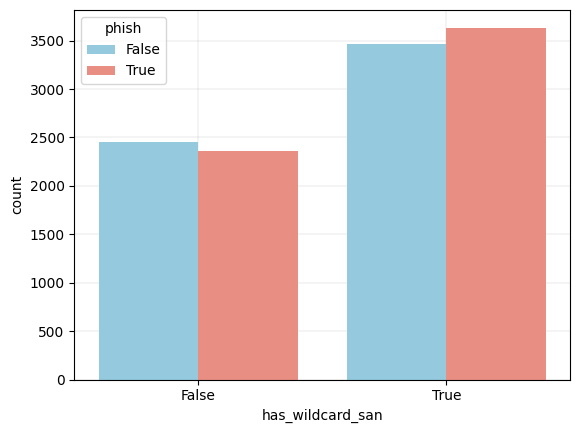

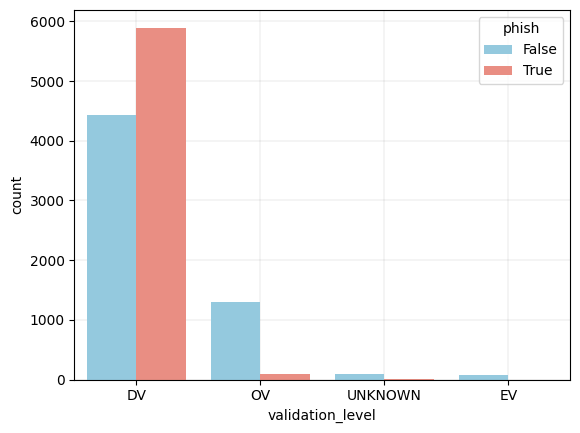

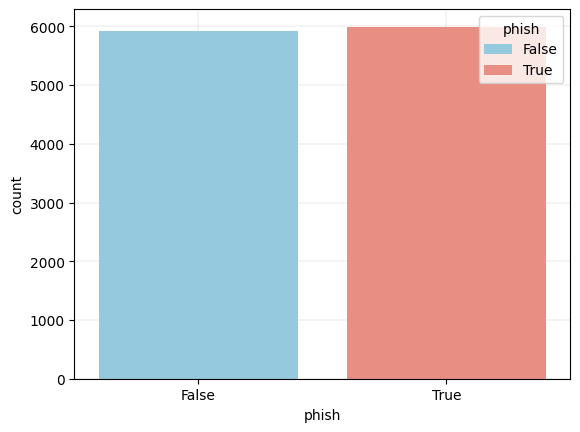

<Figure size 640x480 with 0 Axes>

In [102]:
custom_palette = {True: "salmon", False: "skyblue"}
for column in features_cat:
    # plt.grid(True)
    sns.countplot(data=df, x=column, hue='phish', palette=custom_palette)
    plt.xlabel(column)
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
    plt.gca().set_axisbelow(True)
    # Display the plot
    # plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+column+"_phish.pdf", bbox_inches="tight")
    plt.show()
    plt.clf()

/tmp/ipykernel_4547/267528908.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


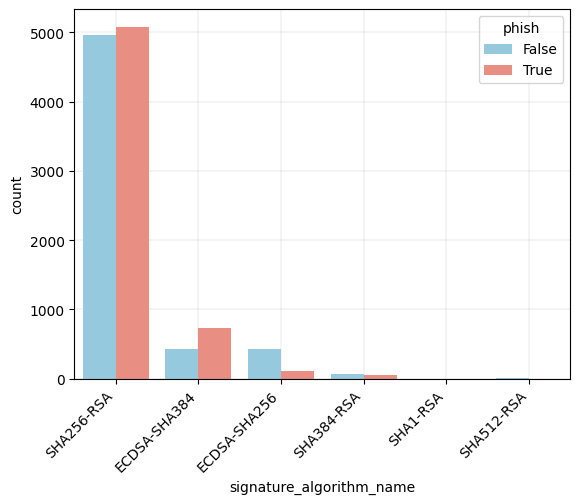

<Figure size 640x480 with 0 Axes>

In [85]:
ax = sns.countplot(data=df, x="signature_algorithm_name", hue='phish', palette=custom_palette)
plt.xlabel("signature_algorithm_name")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Display the plot
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"signature_algorithm_name"+"_phish.pdf", bbox_inches="tight")
plt.show()
plt.clf()

/tmp/ipykernel_4547/1989617204.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


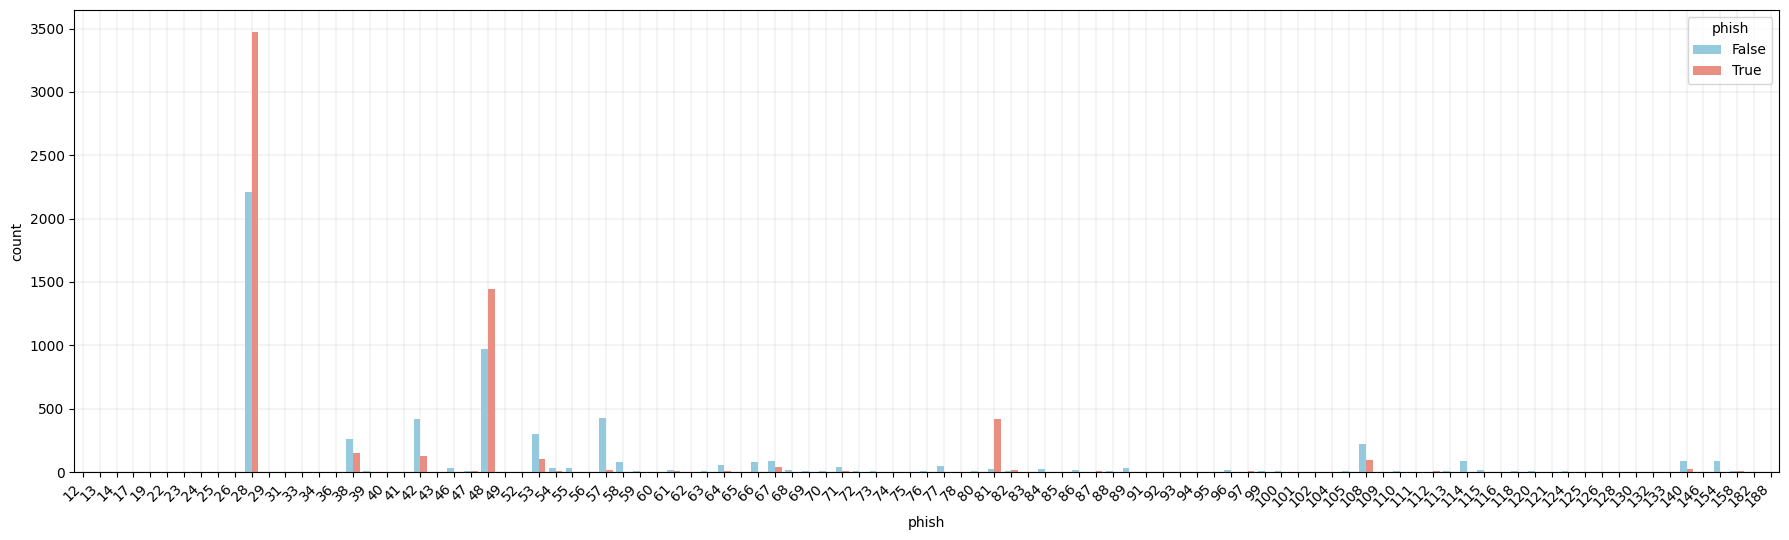

In [86]:
plt.figure(figsize=(22, 6))
ax=sns.countplot(data=df, x= "len_issuer_dn", hue ='phish', palette=custom_palette)#, bins = 'auto')
plt.xlabel(column)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

/tmp/ipykernel_4547/3842930993.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


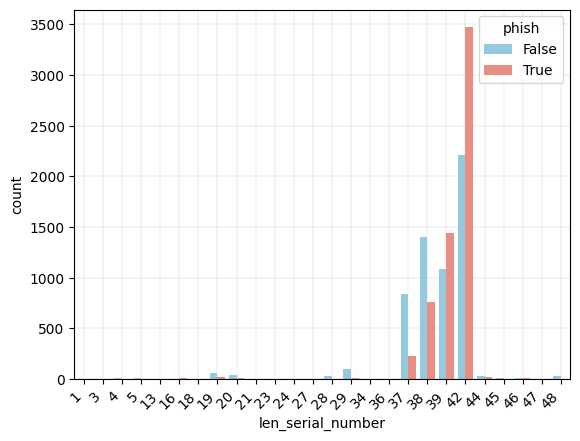

/tmp/ipykernel_4547/3842930993.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


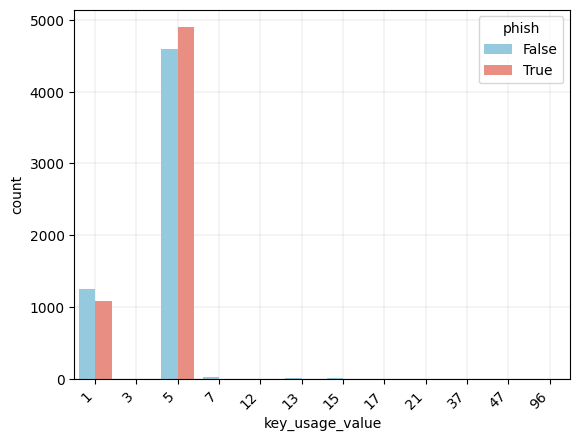

/tmp/ipykernel_4547/3842930993.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


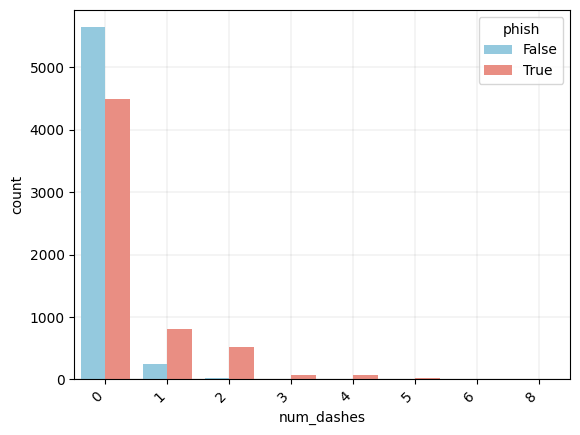

/tmp/ipykernel_4547/3842930993.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


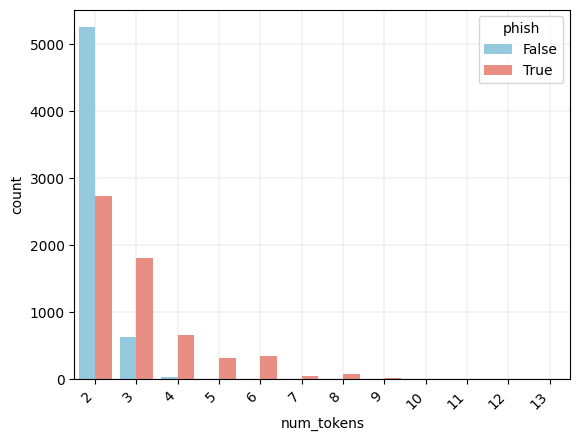

/tmp/ipykernel_4547/3842930993.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


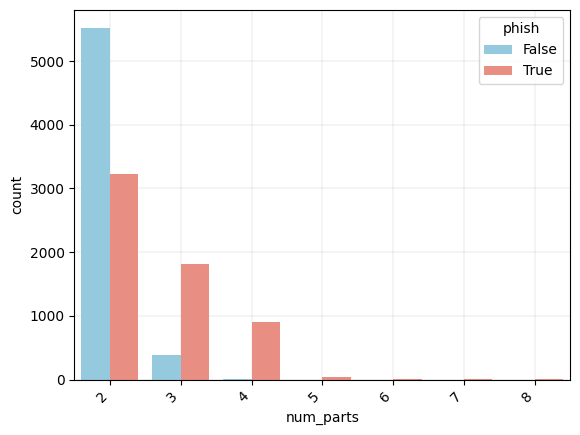

<Figure size 640x480 with 0 Axes>

In [87]:
for column in ["len_serial_number","key_usage_value","num_dashes","num_tokens","num_parts"]:
    ax = sns.countplot(data=df, x=column, hue='phish', palette=custom_palette)
    plt.xlabel(column)
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
    plt.gca().set_axisbelow(True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    # Display the plot
    plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+column+"_phish.pdf", bbox_inches="tight")
    plt.show()#savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+column+"_phish.pdf", bbox_inches="tight")
    plt.clf()

In [88]:
df["length_days"] = df.length_seconds.apply(lambda x: round(x/86400))

In [89]:
df[df["phish"]==False].num_san_dns_names.unique().max()

681

In [90]:
df_full[df_full.num_san_dns_names == 681].dns_names

12955    [accounting.uni-freiburg.de, act.uni-freiburg....
Name: dns_names, dtype: object

/tmp/ipykernel_4547/3461506244.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


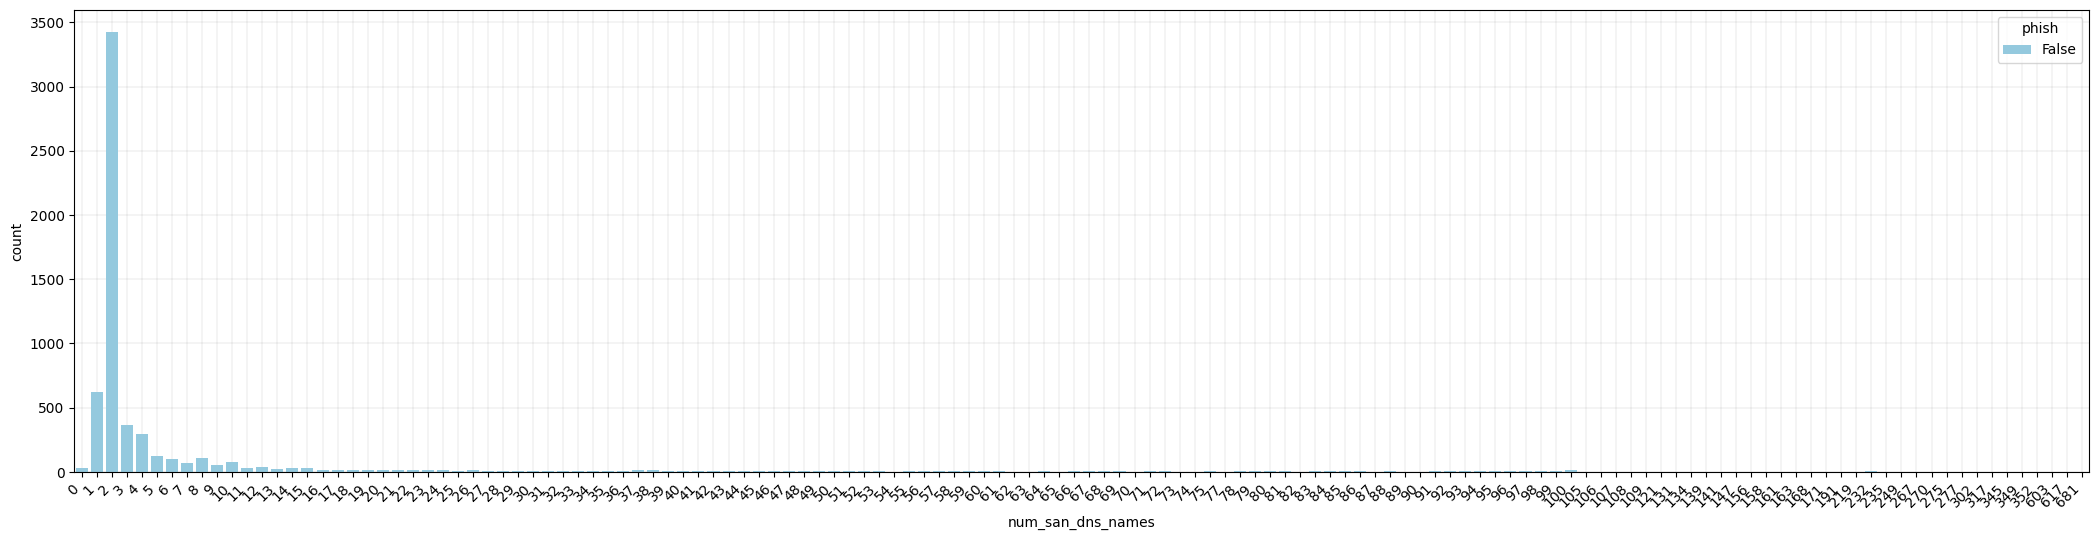

/tmp/ipykernel_4547/3461506244.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


<Figure size 640x480 with 0 Axes>

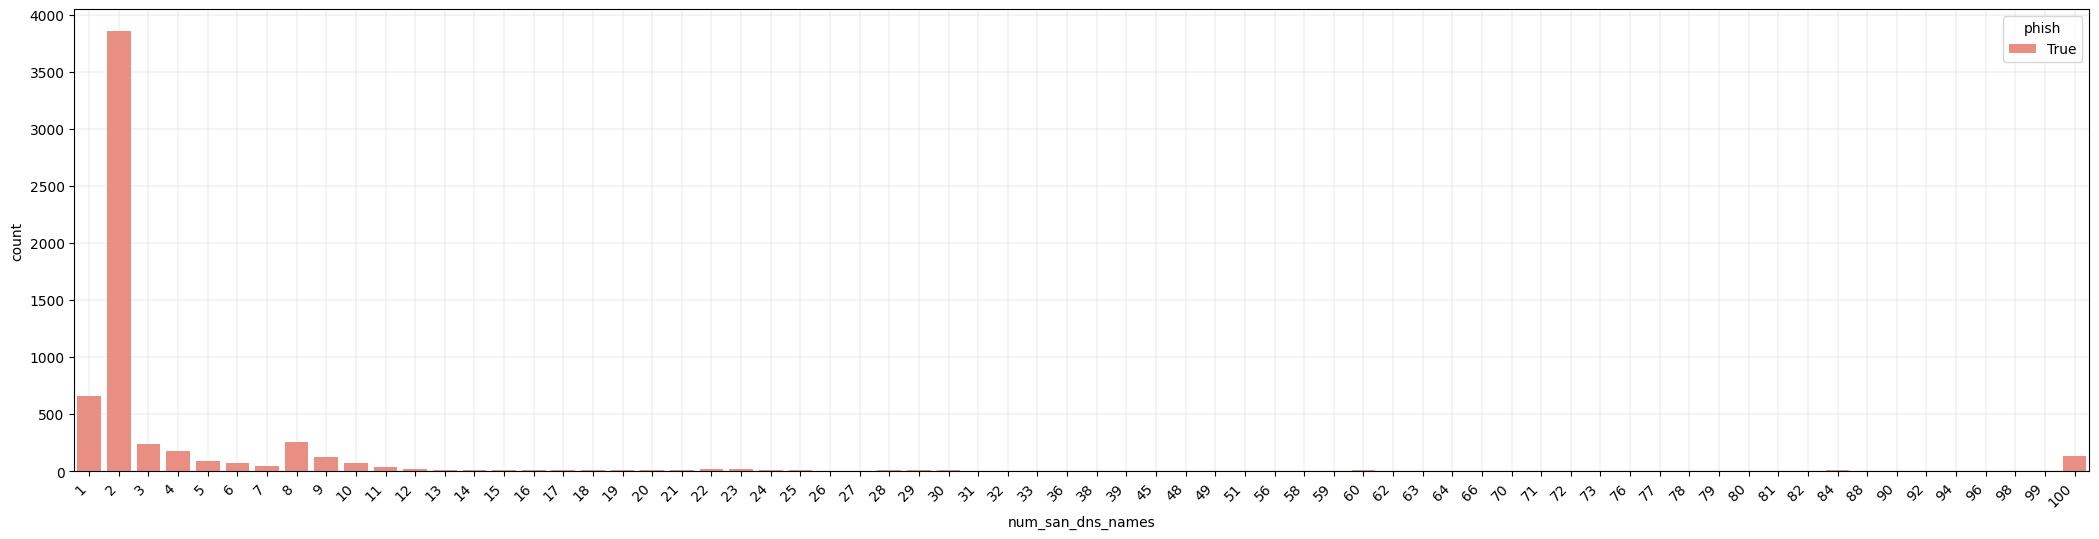

In [91]:
plt.figure(figsize=(26, 6))
ax = sns.countplot(data=df[df["phish"]==False], x="num_san_dns_names", hue="phish", palette=custom_palette)#, kde=True, bins='auto')
plt.xlabel("num_san_dns_names")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"num_san_dns_names"+"_phishFalse.pdf", bbox_inches="tight")
plt.show()
plt.clf()


plt.figure(figsize=(26, 6))
ax = sns.countplot(data=df[df["phish"]==True], x="num_san_dns_names", hue="phish", palette=custom_palette)#, kde=True, bins='auto')
plt.xlabel("num_san_dns_names")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"num_san_dns_names"+"_phishTrue.pdf", bbox_inches="tight")
plt.show()

In [92]:
df_full["dns_names"][0]

['denkc.shop']

In [93]:
df.mean_len_subdomains.value_counts()

0.000000     8754
6.000000      294
4.000000      254
8.000000      195
7.000000      185
             ... 
7.333333        1
11.666667       1
12.666667       1
4.750000        1
32.500000       1
Name: mean_len_subdomains, Length: 84, dtype: int64

/tmp/ipykernel_4547/3618032698.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


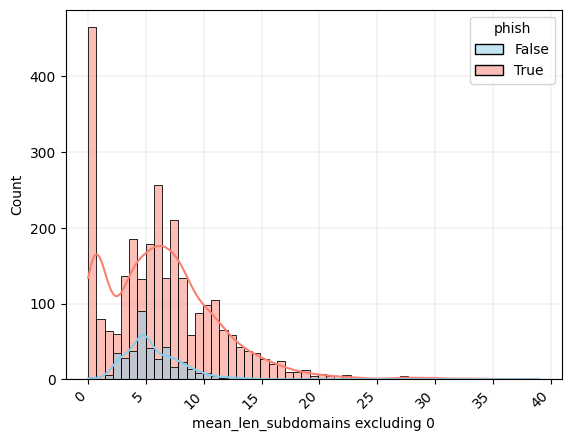

/tmp/ipykernel_4547/3618032698.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


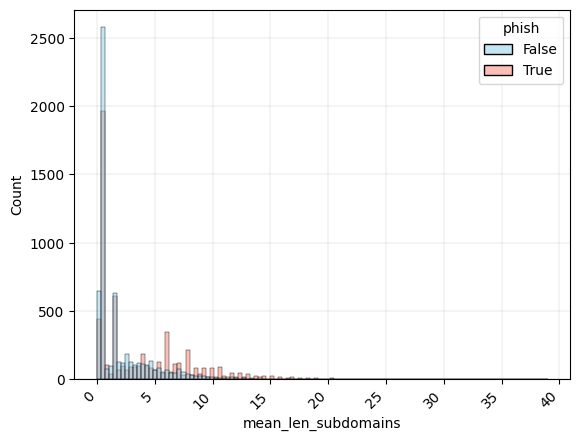

In [94]:
filtered_df = df[df['mean_len_subdomains'] != 0]

# plt.figure(figsize=(26, 6))
ax = sns.histplot(data=filtered_df, x="mean_len_subdomains", hue="phish", palette=custom_palette, kde=True, bins='auto')
plt.xlabel("mean_len_subdomains excluding 0")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"mean_len_subdomains"+"_phishExcluding0.pdf", bbox_inches="tight")
plt.show()
plt.clf()


# plt.figure(figsize=(26, 6))
ax = sns.histplot(data=df, x="mean_len_subdomains", hue="phish", palette=custom_palette)#, kde=True, bins='auto')
plt.xlabel("mean_len_subdomains")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"mean_len_subdomains"+"_phish.pdf", bbox_inches="tight")
plt.show()

In [ ]:
filtered_df = df[df['san_mean_len_subdomains'] != 0]

# plt.figure(figsize=(26, 6))
ax = sns.histplot(data=filtered_df, x="san_mean_len_subdomains", hue="phish", palette=custom_palette, kde=True, bins='auto')
plt.xlabel("san_mean_len_subdomains excluding 0")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"san_mean_len_subdomains"+"_phishExcluding0.pdf", bbox_inches="tight")
plt.show()
plt.clf()


# plt.figure(figsize=(26, 6))
ax = sns.histplot(data=df, x="san_mean_len_subdomains", hue="phish", palette=custom_palette)#, kde=True, bins='auto')
plt.xlabel("san_mean_len_subdomains")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"san_mean_len_subdomains"+"_phish.pdf", bbox_inches="tight")
plt.show()

In [95]:
df.columns

Index(['apple_ever_valid', 'nss_ever_valid', 'microsoft_ever_valid',
       'subject_has_country', 'subject_has_province', 'subject_has_locality',
       'subject_has_common_name', 'subject_only_cn', 'ocsp_urls',
       'crl_dist_point_present', 'pub_key_algorithm', 'version',
       'signature_algorithm_name', 'issuer_has_common_name',
       'subject_is_empty', 'authority_info_access', 'certificate_policies',
       'basic_constraints', 'authority_key_id', 'new_sus_keyword', 'sus_tld',
       'token_is_tld_new', 'is_international', 'has_digit_only_subdomain',
       'has_single_char_subdomain', 'is_wildcard_match', 'has_wildcard_san',
       'validation_level', 'subject_len', 'length_seconds',
       'num_san_dns_names', 'len_serial_number', 'len_issuer_dn', 'lcs_sans',
       'lcs_sans_normed', 'key_usage_value', 'domain_len', 'shannon_entropy',
       'num_dashes', 'num_tokens', 'num_parts', 'frac_special_char',
       'frac_vowels', 'frac_digits', 'mean_len_subdomains', 'char_dive

/tmp/ipykernel_6030/4132013512.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


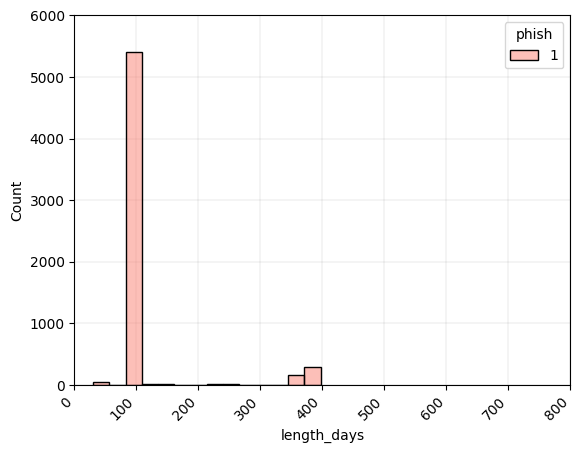

/tmp/ipykernel_6030/4132013512.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


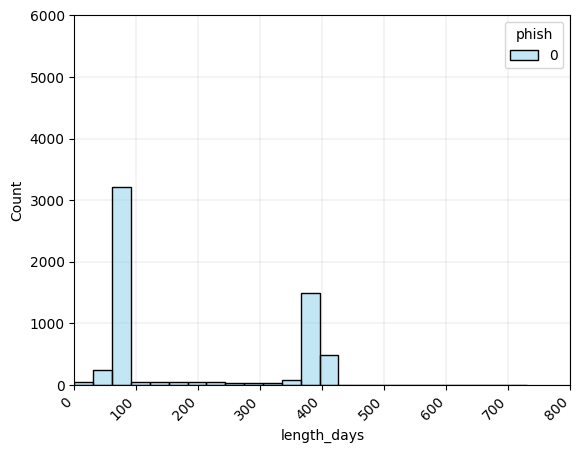

In [13]:
df["length_days"] = df.length_seconds.apply(lambda x: round(x/86400))

# plt.figure(figsize=(26, 6))
ax = sns.histplot(data=df[df["phish"]==True], x="length_days", hue="phish", palette=custom_palette, kde=False, bins='auto')
plt.xlabel("length_days")
ax.set_xlim([0, 800])
ax.set_ylim([0, 6000])
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"length_days"+"_phishTrue.pdf", bbox_inches="tight")
plt.show()
plt.clf()


# plt.figure(figsize=(26, 6))
ax = sns.histplot(data=df[df["phish"]==False], x="length_days", hue="phish", palette=custom_palette, kde=False, bins='auto')
plt.xlabel("length_days")
ax.set_xlim([0, 800])
ax.set_ylim([0, 6000])
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"length_days"+"_phishFalse.pdf", bbox_inches="tight")
plt.show()

/tmp/ipykernel_4547/1815989426.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


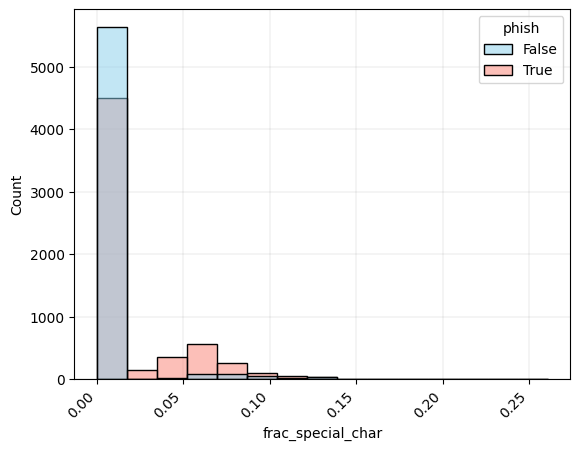

/tmp/ipykernel_4547/1815989426.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


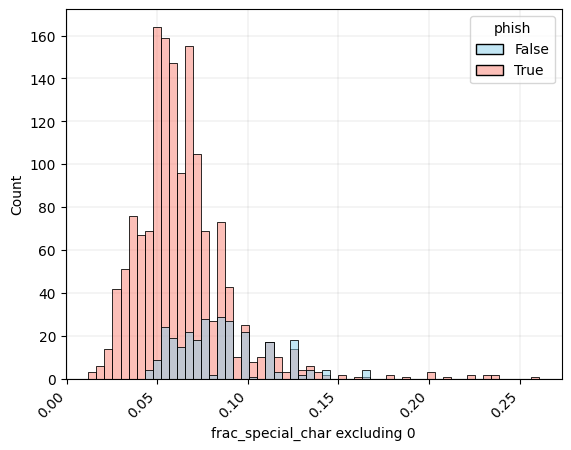

In [97]:
filtered_df = df[df['frac_special_char'] != 0]
ax = sns.histplot(data=df, x="frac_special_char", hue="phish", palette=custom_palette, kde=False, bins='auto')
plt.xlabel("frac_special_char")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"frac_special_char"+"_phish.pdf", bbox_inches="tight")
plt.show()


ax = sns.histplot(data=filtered_df, x="frac_special_char", hue="phish", palette=custom_palette, kde=False, bins='auto')
plt.xlabel("frac_special_char excluding 0")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"frac_special_char"+"_phishExcluding0.pdf", bbox_inches="tight")
plt.show()

/tmp/ipykernel_4547/3787550241.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


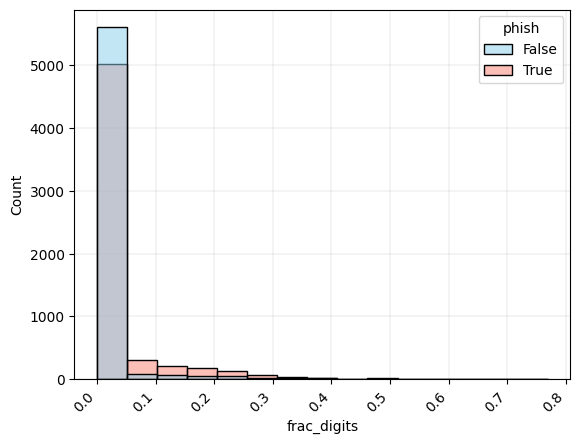

/tmp/ipykernel_4547/3787550241.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


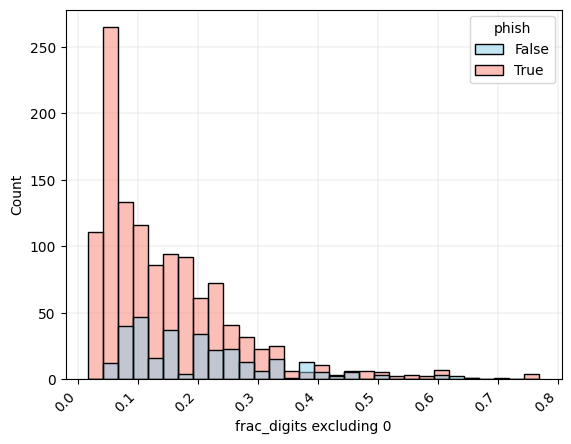

In [98]:
filtered_df = df[df['frac_digits'] != 0]
ax = sns.histplot(data=df, x="frac_digits", hue="phish", palette=custom_palette, kde=False, bins='auto')
plt.xlabel("frac_digits")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"frac_digits"+"_phish.pdf", bbox_inches="tight")
plt.show()


ax = sns.histplot(data=filtered_df, x="frac_digits", hue="phish", palette=custom_palette, kde=False, bins='auto')
plt.xlabel("frac_digits excluding 0")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"frac_digits"+"_phishExcluding0.pdf", bbox_inches="tight")
plt.show()

subject_len


/tmp/ipykernel_4547/117246575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


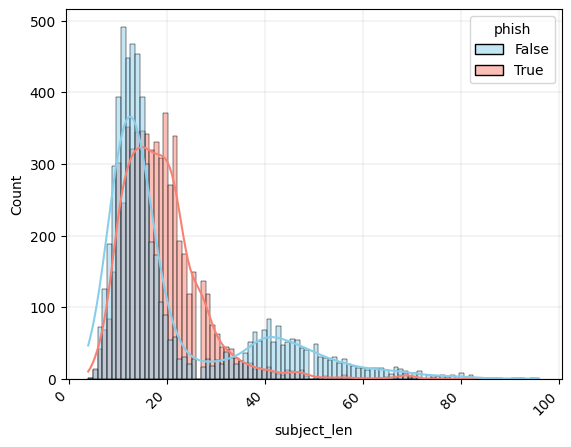

lcs_sans


/tmp/ipykernel_4547/117246575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


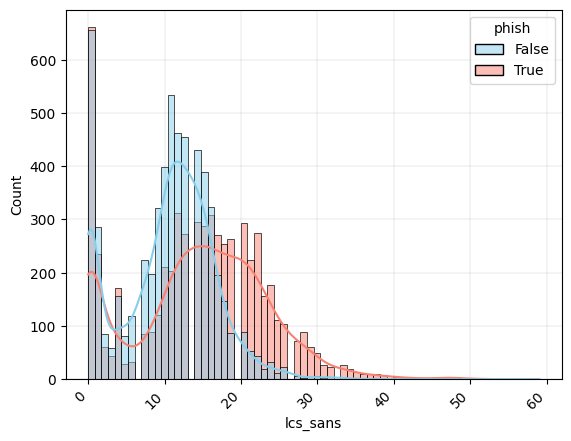

lcs_sans_normed


/tmp/ipykernel_4547/117246575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


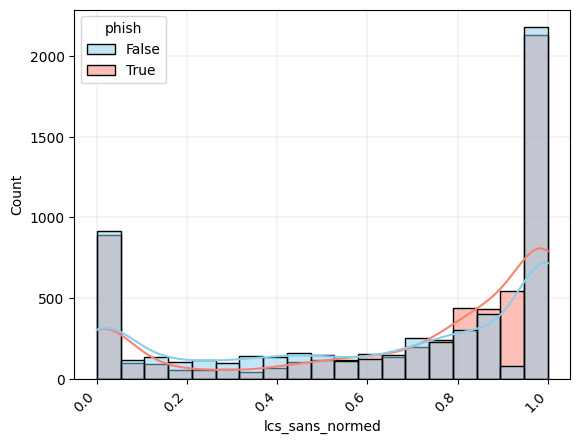

domain_len


/tmp/ipykernel_4547/117246575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


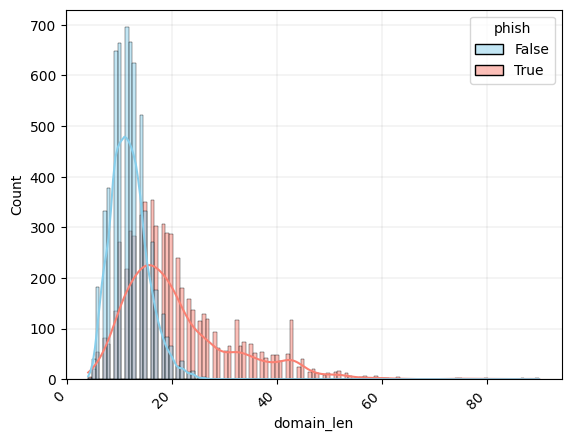

shannon_entropy


/tmp/ipykernel_4547/117246575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


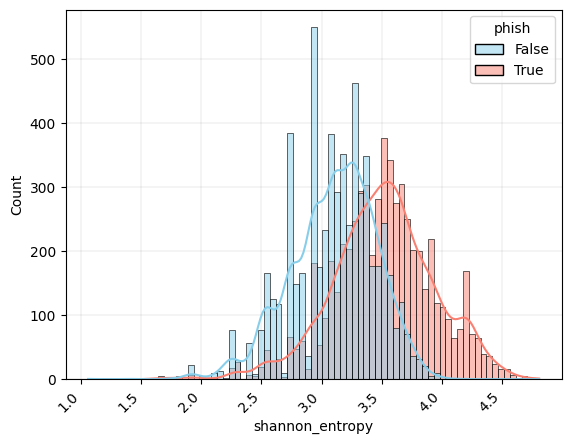

frac_vowels


/tmp/ipykernel_4547/117246575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


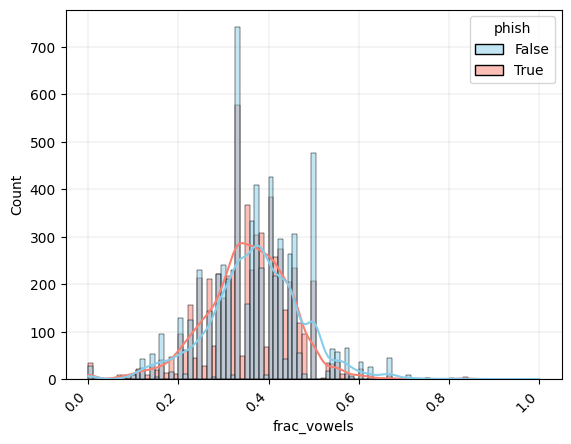

char_diversity


/tmp/ipykernel_4547/117246575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


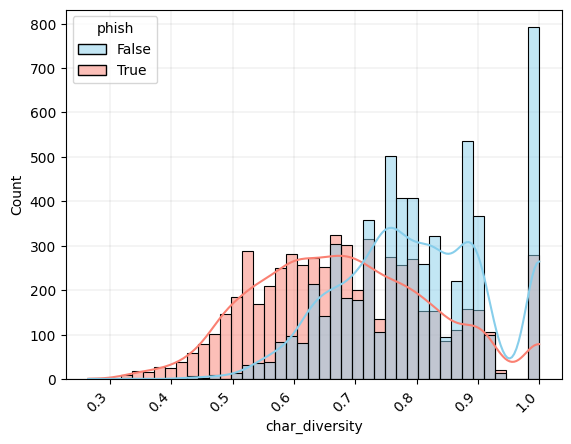

alphabet_size


/tmp/ipykernel_4547/117246575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


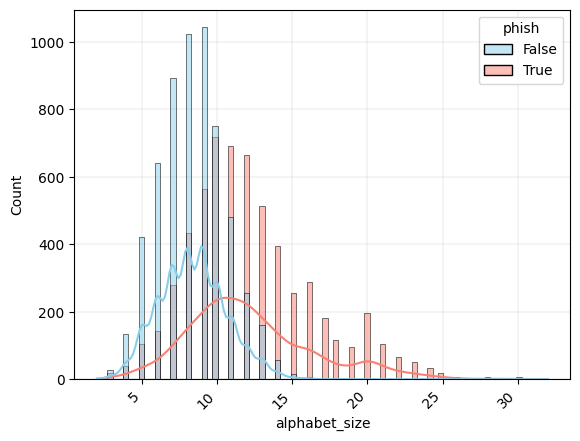

<Figure size 640x480 with 0 Axes>

In [99]:
for column in ["subject_len", "lcs_sans", "lcs_sans_normed", "domain_len", "shannon_entropy", "frac_vowels", "char_diversity", "alphabet_size",]:
    print(column)
    ax = sns.histplot(data=df, x=column, hue='phish', palette=custom_palette, kde=True, bins='auto')
    plt.xlabel(column)
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
    plt.gca().set_axisbelow(True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+column+"_phish.pdf", bbox_inches="tight")
    plt.show()
    plt.clf()

phish


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


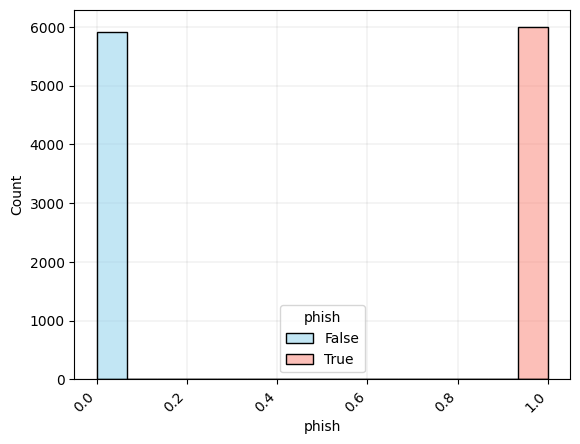

mean_san_domain_len


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


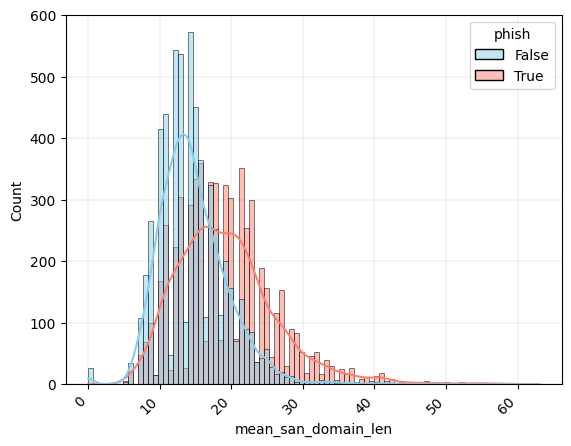

san_shannon_entropy


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


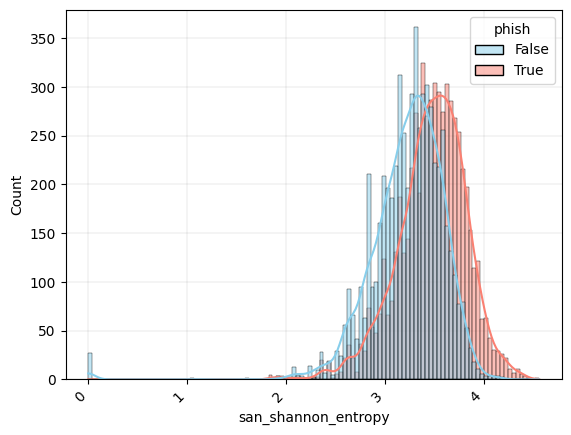

san_token_is_tld


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


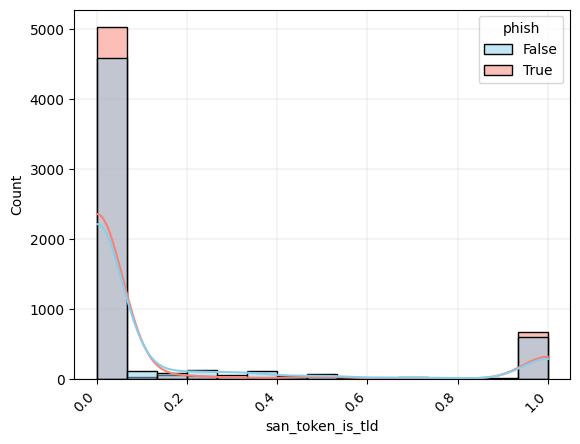

san_frac_special_char


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


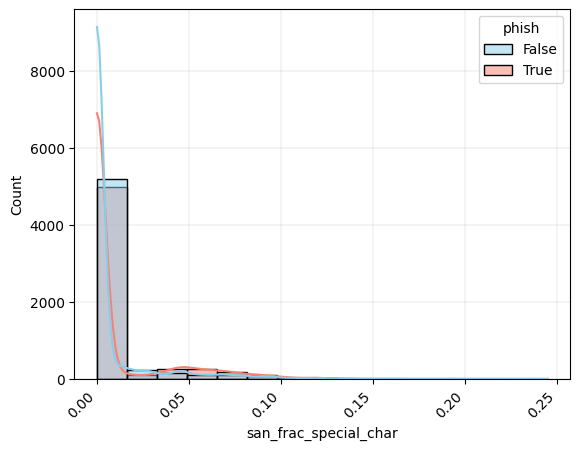

san_frac_vowels


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


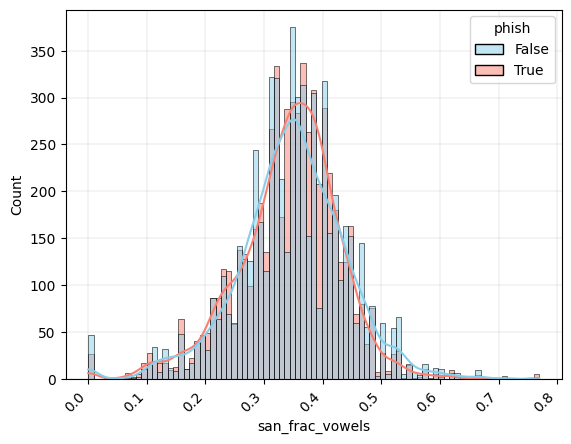

san_frac_digits


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


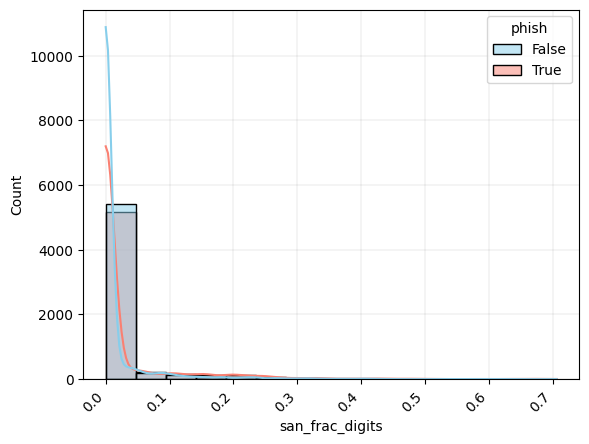

san_mean_len_subdomains


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


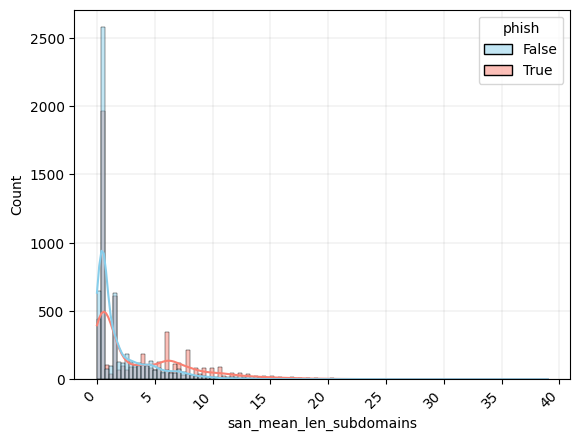

san_char_diversity


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


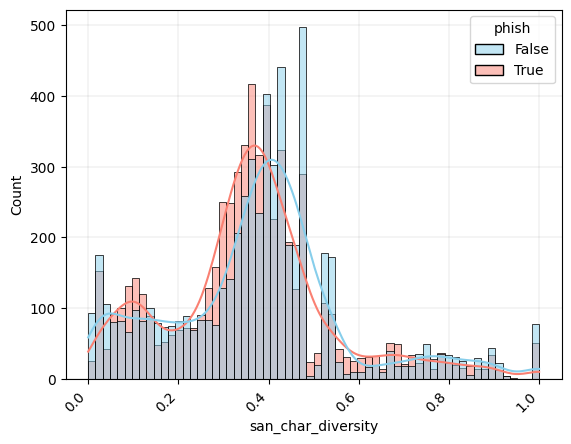

san_alphabet_size


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


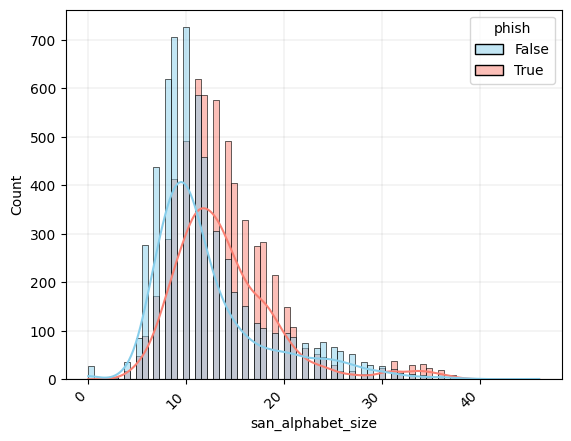

san_num_dashes


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


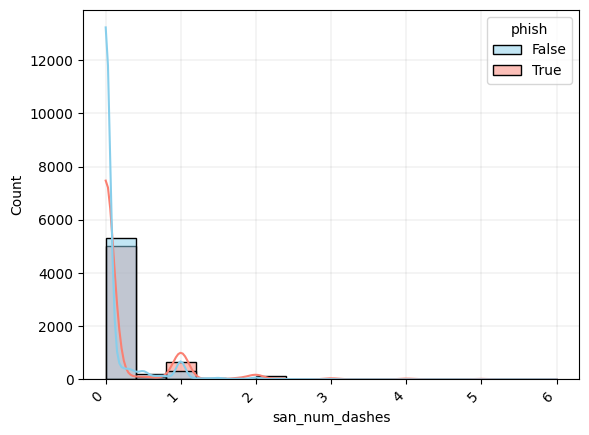

san_num_tokens


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


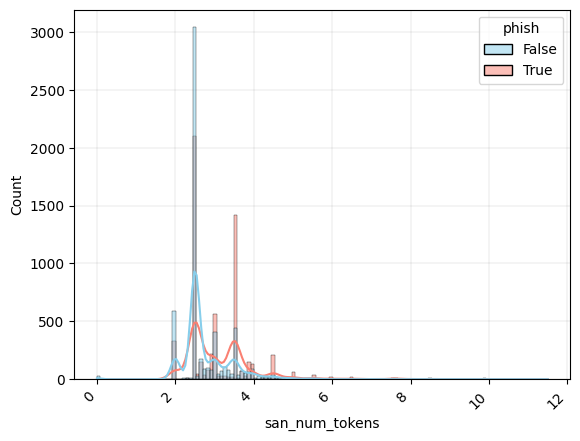

san_num_parts


/tmp/ipykernel_4547/2268817796.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


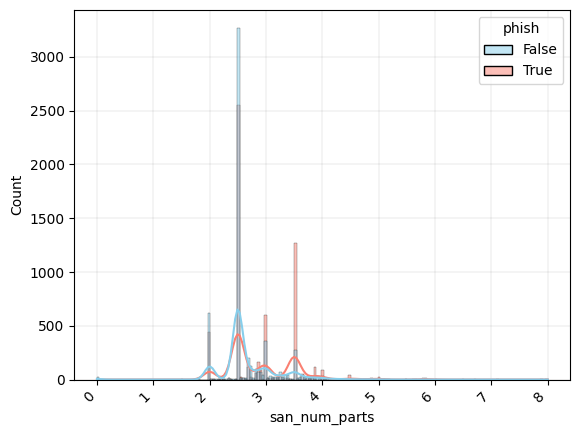

<Figure size 640x480 with 0 Axes>

In [100]:
for column in features_cont_sans:
    print(column)
    ax = sns.histplot(data=df, x=column, hue='phish', palette=custom_palette, kde=True, bins='auto')
    plt.xlabel(column)
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
    plt.gca().set_axisbelow(True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+column+"_phish.pdf", bbox_inches="tight")
    plt.show()
    plt.clf()

san_sus_keyword


/tmp/ipykernel_4547/721048828.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


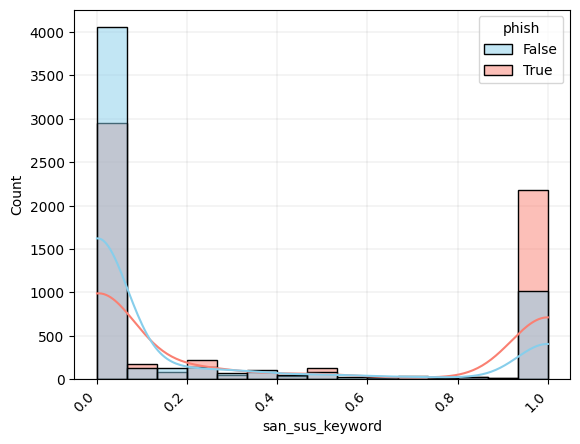

san_sus_tld


/tmp/ipykernel_4547/721048828.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


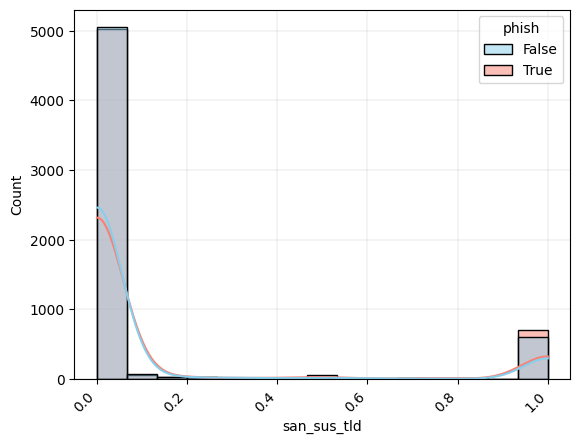

san_token_is_tld


/tmp/ipykernel_4547/721048828.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


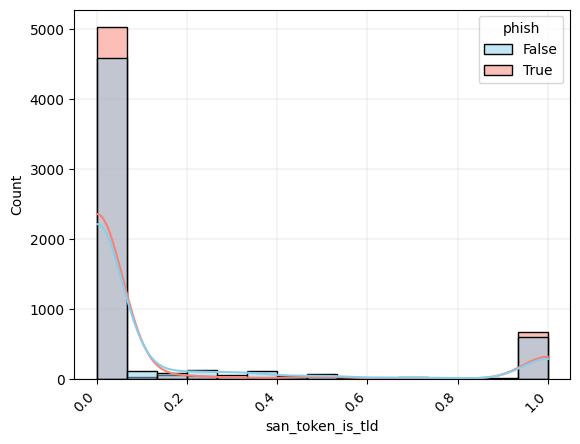

san_is_international


/tmp/ipykernel_4547/721048828.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


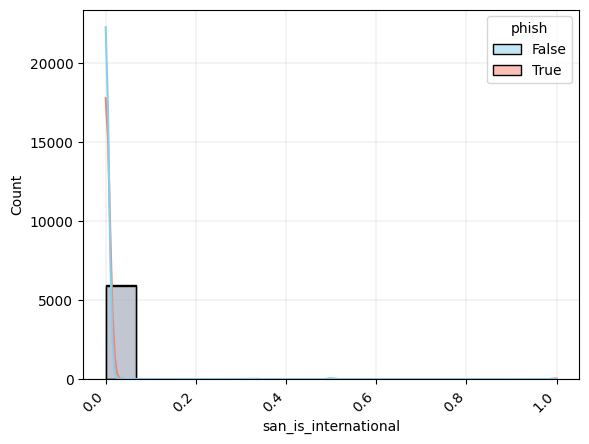

san_has_digit_only_subdomain


/tmp/ipykernel_4547/721048828.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


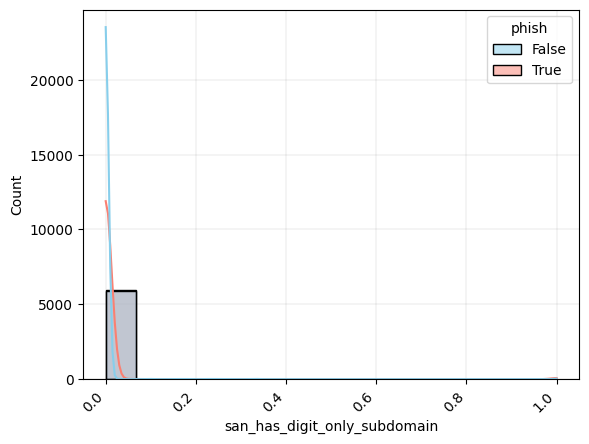

san_has_single_char_subdomain


/tmp/ipykernel_4547/721048828.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


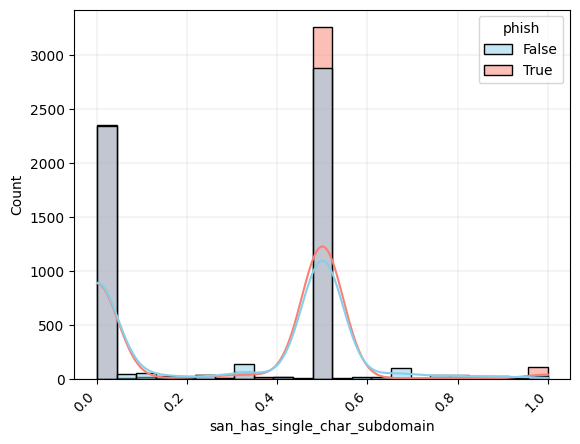

<Figure size 640x480 with 0 Axes>

In [109]:
for column in features_cat_sans:
    print(column)
    ax = sns.histplot(data=df, x=column, hue='phish', palette=custom_palette, kde=True, bins='auto')
    plt.xlabel(column)
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
    plt.gca().set_axisbelow(True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+column+"_phish.pdf", bbox_inches="tight")
    plt.show()
    plt.clf()

/tmp/ipykernel_4547/1000468109.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


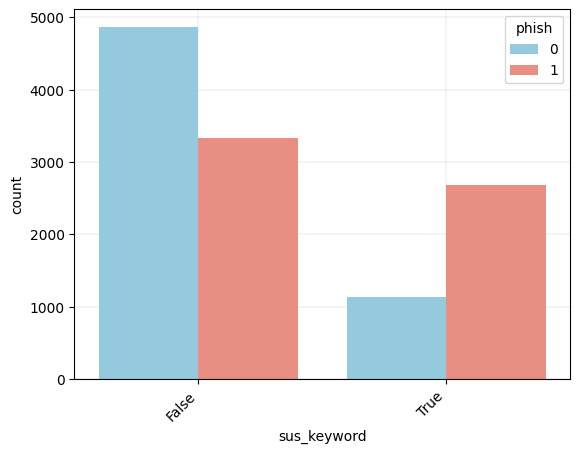

/tmp/ipykernel_4547/1000468109.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


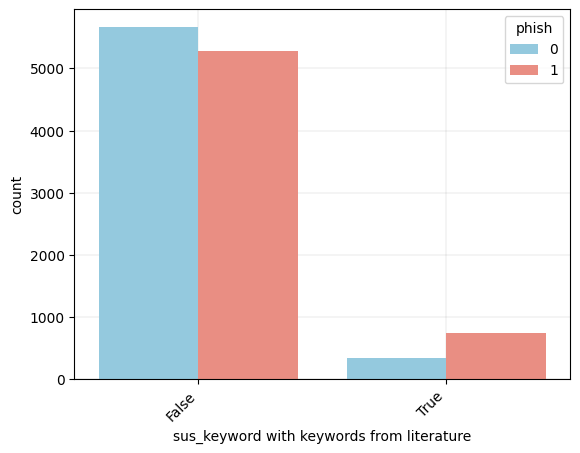

In [121]:
df = pd.read_pickle("balanced_final.pkl")


# plt.figure(figsize=(26, 6))
ax = sns.countplot(data=df, x="new_sus_keyword", hue="phish", palette=custom_palette)#, kde=True, bins='auto')
plt.xlabel("sus_keyword")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"new_sus_keywords"+"_phish.pdf", bbox_inches="tight")
plt.show()
plt.clf()


# plt.figure(figsize=(26, 6))
ax = sns.countplot(data=df, x="sus_keyword", hue="phish", palette=custom_palette)#, kde=True, bins='auto')
plt.xlabel("sus_keyword with keywords from literature")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5, zorder=0)
plt.gca().set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig("/home/mha/PycharmProjects/thesis/exploratoryPlots/"+"sus_keywords_old"+"_phish.pdf", bbox_inches="tight")
plt.show()

In [115]:
df.new_sus_keyword

Series([], Name: new_sus_keyword, dtype: bool)